In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
train_data = pd.read_excel('../../Datasets/FlightFarePrediction/Data_Train.xlsx')

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
19h 50m      1
35h 35m      1
47h          1
27h 30m      1
41h 20m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.shape

(10683, 11)

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data['Journey_Day'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [12]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [13]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [14]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [15]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [16]:
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [17]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [18]:
duration = list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] =   duration[i].strip() + " 0m"
        else:
              duration[i] = "0h " +   duration[i]
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split()[-1].split(sep='m')[0]))

In [19]:
print(np.array([duration_hours,duration, duration_mins]))

[['2' '7' '19' ... '3' '2' '8']
 ['2h 50m' '7h 25m' '19h 0m' ... '3h 0m' '2h 40m' '8h 20m']
 ['50' '25' '0' ... '0' '40' '20']]


In [20]:
duration_mins

[50,
 25,
 0,
 25,
 45,
 25,
 30,
 5,
 30,
 50,
 15,
 35,
 15,
 10,
 35,
 35,
 30,
 35,
 0,
 35,
 10,
 20,
 50,
 55,
 20,
 10,
 45,
 55,
 50,
 15,
 15,
 25,
 50,
 0,
 30,
 25,
 15,
 30,
 15,
 55,
 5,
 30,
 5,
 45,
 0,
 50,
 50,
 15,
 5,
 55,
 15,
 20,
 50,
 0,
 50,
 15,
 5,
 15,
 30,
 5,
 25,
 20,
 15,
 30,
 15,
 25,
 50,
 30,
 20,
 15,
 25,
 30,
 20,
 30,
 0,
 45,
 50,
 30,
 5,
 15,
 50,
 40,
 10,
 35,
 0,
 20,
 25,
 45,
 20,
 0,
 15,
 5,
 30,
 20,
 35,
 25,
 40,
 0,
 25,
 35,
 20,
 15,
 30,
 0,
 45,
 55,
 10,
 30,
 20,
 55,
 0,
 55,
 45,
 10,
 55,
 25,
 5,
 10,
 40,
 55,
 40,
 25,
 5,
 15,
 25,
 10,
 10,
 0,
 50,
 20,
 0,
 55,
 10,
 45,
 0,
 50,
 40,
 15,
 45,
 50,
 0,
 15,
 25,
 35,
 50,
 35,
 25,
 55,
 50,
 10,
 20,
 25,
 50,
 20,
 15,
 35,
 35,
 50,
 45,
 10,
 50,
 45,
 15,
 20,
 30,
 25,
 30,
 40,
 10,
 45,
 35,
 5,
 30,
 30,
 10,
 35,
 5,
 50,
 0,
 0,
 25,
 30,
 30,
 0,
 20,
 30,
 45,
 10,
 35,
 45,
 55,
 35,
 20,
 5,
 40,
 15,
 10,
 25,
 50,
 25,
 15,
 50,
 15,
 50,
 20,
 55,
 

In [21]:
train_data['Duration_hours']= duration_hours
train_data['Duration_mins']= duration_mins

In [22]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [23]:
train_data.drop('Duration', axis=1, inplace=True)

In [24]:
train_data.drop('Arrival_Time', axis=1, inplace=True)

In [25]:
train_data.drop('Dep_Time', axis=1, inplace=True)

In [26]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

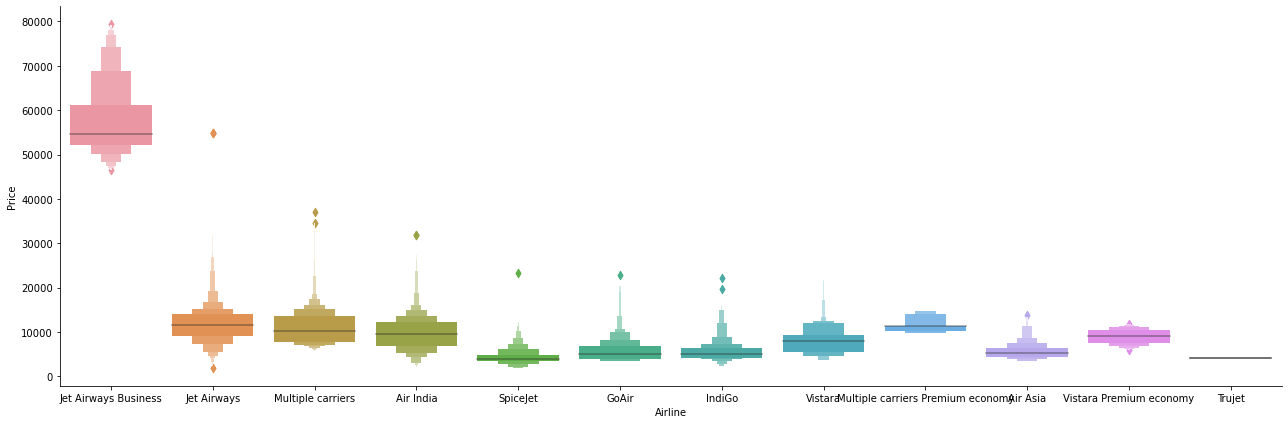

In [27]:
sns.catplot(x='Airline', y = 'Price', data= train_data.sort_values('Price', ascending=False), height=6, aspect=3, kind="boxen")

In [28]:
# As Airline is nominal categorical data, we perform OnehotEncoding

Airline = train_data['Airline']
Airline = pd.get_dummies(train_data['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

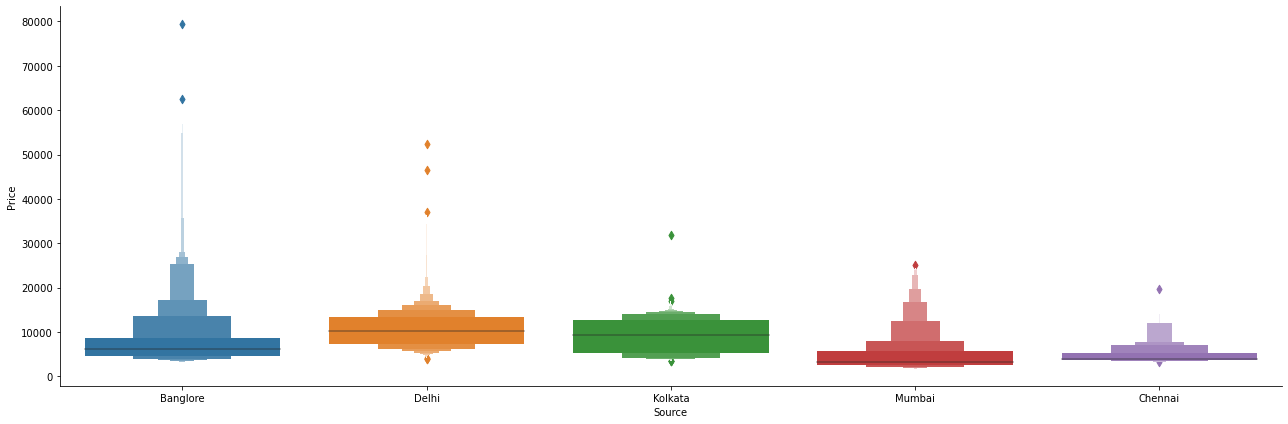

In [30]:
sns.catplot(x='Source', y = 'Price', data= train_data.sort_values('Price', ascending=False), height=6, aspect=3, kind="boxen")

In [31]:
# As Source is nominal categorical data, we perform OnehotEncoding

Source = train_data['Source']
Source = pd.get_dummies(train_data['Source'], drop_first=True, prefix="Source")
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [32]:
# As Destination is nominal categorical data, we perform OnehotEncoding

Destination = train_data['Destination']
Destination = pd.get_dummies(train_data['Destination'], drop_first=True, prefix="Dest")
Destination.head(2)

,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [33]:
#Dropping Route and Additional_Info columns
train_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [34]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
#Totalstops is an ordinal data, hence using Label encoder
train_data.replace({'1 stop': 1, 'non-stop': 0, '2 stops': 2 , '3 stops': 3, '4 stops': 4}, inplace=True)

In [36]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [37]:
data_train.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0


In [38]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', 'Dest_New Delhi'],
      dtype='object')

In [39]:
data_train.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [40]:
data_train.head(2)

,Total_Stops,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0


In [41]:
data_train.shape

(10682, 30)

In [42]:
#Do the steps for Testset
train_data = pd.read_excel('../../Datasets/FlightFarePrediction/Test_set.xlsx')

In [43]:
train_data.dropna(inplace=True)
train_data['Journey_Day'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month
train_data.drop('Date_of_Journey', axis=1, inplace=True)

train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

duration = list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] =   duration[i].strip() + " 0m"
        else:
              duration[i] = "0h " +   duration[i]
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split()[-1].split(sep='m')[0]))
    
train_data['Duration_hours']= duration_hours
train_data['Duration_mins']= duration_mins


train_data.drop('Duration', axis=1, inplace=True)
train_data.drop('Arrival_Time', axis=1, inplace=True)
train_data.drop('Dep_Time', axis=1, inplace=True)

# As Airline is nominal categorical data, we perform OnehotEncoding

Airline = train_data['Airline']
Airline = pd.get_dummies(train_data['Airline'], drop_first=True)
Airline.head()

# As Source is nominal categorical data, we perform OnehotEncoding

Source = train_data['Source']
Source = pd.get_dummies(train_data['Source'], drop_first=True, prefix="Source")
Source.head()

Destination = train_data['Destination']
Destination = pd.get_dummies(train_data['Destination'], drop_first=True, prefix="Dest")
Destination.head()

train_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)
train_data['Total_Stops'].value_counts()

#Totalstops is an ordinal data, hence using Label encoder
train_data.replace({'1 stop': 1, 'non-stop': 0, '2 stops': 2 , '3 stops': 3, '4 stops': 4}, inplace=True)

data_test = pd.concat([train_data, Airline, Source, Destination], axis=1)
data_test.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)


In [44]:
data_test.head()

,Total_Stops,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
data_test.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', 'Dest_New Delhi'],
      dtype='object')

In [46]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', 'Dest_New Delhi'],
      dtype='object')

In [47]:
data_train.head(2)

,Total_Stops,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0


In [48]:
X = data_train.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', 'Dest_New Delhi'] ]

In [49]:
X.head()

,Total_Stops,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
y = data_train.loc[:, 'Price']

In [51]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

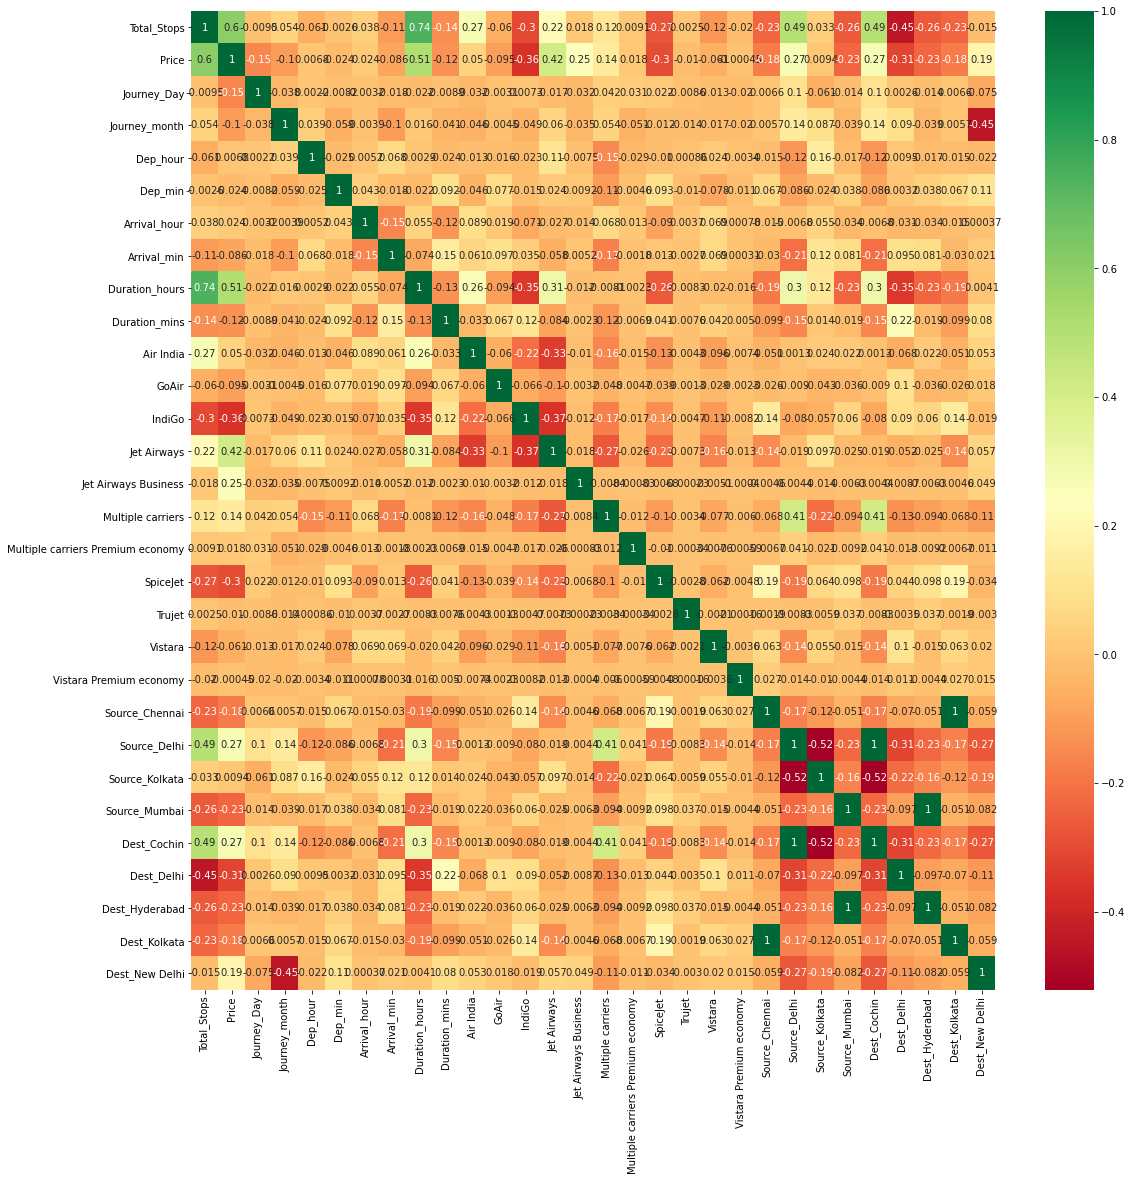

In [52]:
#correlation between independent and dependent variables
plt.figure(figsize=(18,18))
sns.heatmap(data_train.corr(), annot=True, cmap = 'RdYlGn' )

In [53]:
from sklearn.ensemble import ExtraTreesRegressor

In [54]:
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

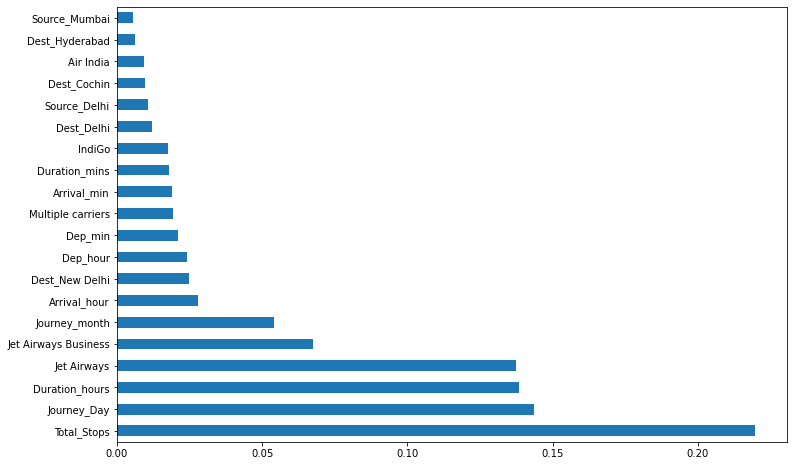

In [55]:
#Plot graph of feature importance

plt.figure(figsize=(12,8))
feat_importance = pd.Series(selection.feature_importances_, index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [56]:
#Fit using Random Forest model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
y_pred = reg_rf.predict(X_test)

In [59]:
reg_rf.score(X_train, y_train)

0.9533405049837079

In [60]:
reg_rf.score(X_test, y_test)

0.7983706421992903

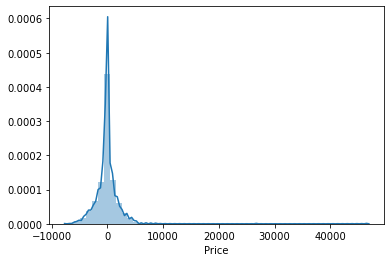

In [61]:
sns.distplot(y_test - y_pred)

Text(0, 0.5, 'y_pred')

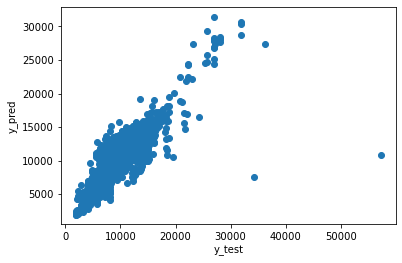

In [62]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [63]:
from sklearn import metrics
print("MAE ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE  1168.887646639873
MSE  4347543.569503472
RMSE  2085.076394164845


In [64]:
metrics.r2_score(y_test, y_pred)

0.7983706421992903

In [57]:
#Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV

In [58]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# number of features to be considered at each split
max_features = ['auto', 'sqrt']
# max number of levels in  a tree
max_depth = [int(x) for x in np.linspace(5,30 , num=6)]
#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [59]:
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [60]:
max_depth

[5, 10, 15, 20, 25, 30]

In [61]:
# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [62]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [135]:
#Random search of parameters using 5 fold cross validation
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error',
                               n_iter=10, cv = 5, verbose=2, random_state=42, n_jobs=1)

In [136]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  13.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [143]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [144]:
y_pred = rf_random.predict(X_test)

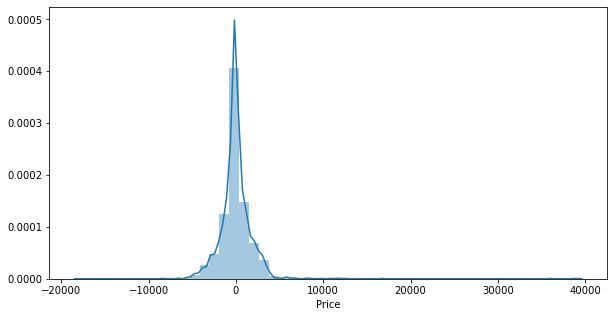

In [145]:
plt.figure(figsize=(10, 5))
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'y_pred')

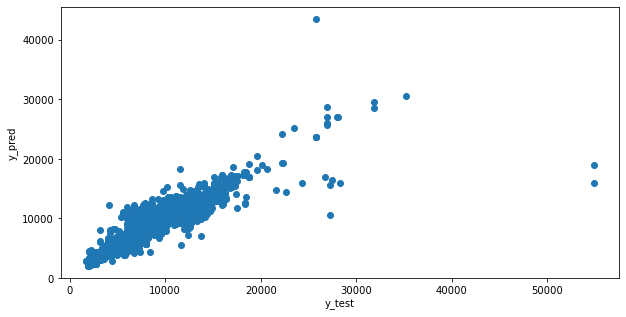

In [146]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [65]:
import pickle


In [66]:
file = open('flight_rf.pkl', 'wb')
pickle.dump(reg_rf, file)
file.close()

In [67]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [68]:
y_pred = forest.predict(X_test)

In [69]:
metrics.r2_score(y_test, y_pred)

0.7983706421992903

In [70]:
model.close()